# 1. Linear regression

## 1.1 기존 프로그램 방식

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#섭씨 온도(인풋)를 받아 화씨온도(target데이터)로 출력

In [3]:
def celsius_to_faherenheit(x):
    return x*1.8 + 32

In [4]:
input_c = int(input(' 섭씨 온도는 ? '))
print('화씨온도는', celsius_to_faherenheit(input_c))

 섭씨 온도는 ? 1
화씨온도는 33.8


## 1.2 머신러닝 프로그램 방식
- 1. 데이터셋 (훈련데이터셋, 검증데이터셋, 시험데이터셋)
- 2. 데이터 전처리 : 훈련데이터셋, 검증데이터셋, 시험데이터 셋
- 3. 모델 구성
- 4. 모델 학습과정 설정
- 5. 모델 학습 시키기
- 6. 모델 평가(시험데이터 셋으로)
- 7. 모델 사용(입력값을 토대로 예측값을 도출)

In [6]:
# 1. 데이터 확보
data_C= np.array(range(100))
data_C # 입력값

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [7]:
data_F = celsius_to_faherenheit(data_C)
data_F # target 값

array([ 32. ,  33.8,  35.6,  37.4,  39.2,  41. ,  42.8,  44.6,  46.4,
        48.2,  50. ,  51.8,  53.6,  55.4,  57.2,  59. ,  60.8,  62.6,
        64.4,  66.2,  68. ,  69.8,  71.6,  73.4,  75.2,  77. ,  78.8,
        80.6,  82.4,  84.2,  86. ,  87.8,  89.6,  91.4,  93.2,  95. ,
        96.8,  98.6, 100.4, 102.2, 104. , 105.8, 107.6, 109.4, 111.2,
       113. , 114.8, 116.6, 118.4, 120.2, 122. , 123.8, 125.6, 127.4,
       129.2, 131. , 132.8, 134.6, 136.4, 138.2, 140. , 141.8, 143.6,
       145.4, 147.2, 149. , 150.8, 152.6, 154.4, 156.2, 158. , 159.8,
       161.6, 163.4, 165.2, 167. , 168.8, 170.6, 172.4, 174.2, 176. ,
       177.8, 179.6, 181.4, 183.2, 185. , 186.8, 188.6, 190.4, 192.2,
       194. , 195.8, 197.6, 199.4, 201.2, 203. , 204.8, 206.6, 208.4,
       210.2])

In [18]:
# 2. 컴퓨터에게 학습을 시키기 위해 data normalize함(전체의 편차 줄이기. 이상적인 편차 0~1)
scaled_data_C = data_C/100.0
scaled_data_F = data_F/100.0
print(scaled_data_C, end='\n\n')
print(scaled_data_F)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]

[0.32  0.338 0.356 0.374 0.392 0.41  0.428 0.446 0.464 0.482 0.5   0.518
 0.536 0.554 0.572 0.59  0.608 0.626 0.644 0.662 0.68  0.698 0.716 0.734
 0.752 0.77  0.788 0.806 0.824 0.842 0.86  0.878 0.896 0.914 0.932 0.95
 0.968 0.986 1.004 1.022 1.04  1.058 1.076 1.094 1.112 1.13  1.148 1.166
 1.184 1.202 1.22  1.238 1.256 1.274 1.292 1.31  1.328 1.346 1.364 1.382
 1.4   1.418 1.436 1.454 1.472 1.49  1.508 1.526 1.544 1.562 1.58  1.598
 1.616 1.634 1.652 1.67  1.688 1.706 1.724 1.742 1.76

In [9]:
# 3. 모델 구성
from tensorflow.keras.models import Sequential # 모델 생성 Class
from tensorflow.keras.layers import Dense # 입력값과 출력값 세팅
model = Sequential()
model.add(Dense(1,input_dim=1)) # 1 : target값 1개 , input_dim=1 : 독립변수 1개 

In [10]:
# 4 . 모델 학습과정 설정
model.compile(loss='mse',optimizer='rmsprop',metrics=['mae']) # loss를 찾아가는 방식
print(model.summary()) 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None


In [16]:
# 학습전 예측
print(model.predict([1]))
# 랜덤값이 나온다.

[[-1.249136]]


In [17]:
model.save('model/before_learning.h5')

In [19]:
# 4. 모델 학습시키기
hist = model.fit(scaled_data_C,scaled_data_F,epochs=1000,verbose=2)
# epochs : 반복횟수
# verbose : 학습할때 loss를 뿌리는것 0은 안뿌림.

Epoch 1/1000
4/4 - 1s - loss: 4.1027 - mae: 1.8248
Epoch 2/1000
4/4 - 0s - loss: 4.0567 - mae: 1.8132
Epoch 3/1000
4/4 - 0s - loss: 4.0260 - mae: 1.8054
Epoch 4/1000
4/4 - 0s - loss: 3.9980 - mae: 1.7982
Epoch 5/1000
4/4 - 0s - loss: 3.9750 - mae: 1.7924
Epoch 6/1000
4/4 - 0s - loss: 3.9483 - mae: 1.7855
Epoch 7/1000
4/4 - 0s - loss: 3.9258 - mae: 1.7798
Epoch 8/1000
4/4 - 0s - loss: 3.9028 - mae: 1.7739
Epoch 9/1000
4/4 - 0s - loss: 3.8803 - mae: 1.7680
Epoch 10/1000
4/4 - 0s - loss: 3.8562 - mae: 1.7618
Epoch 11/1000
4/4 - 0s - loss: 3.8327 - mae: 1.7556
Epoch 12/1000
4/4 - 0s - loss: 3.8123 - mae: 1.7503
Epoch 13/1000
4/4 - 0s - loss: 3.7907 - mae: 1.7446
Epoch 14/1000
4/4 - 0s - loss: 3.7693 - mae: 1.7391
Epoch 15/1000
4/4 - 0s - loss: 3.7446 - mae: 1.7327
Epoch 16/1000
4/4 - 0s - loss: 3.7218 - mae: 1.7266
Epoch 17/1000
4/4 - 0s - loss: 3.7003 - mae: 1.7208
Epoch 18/1000
4/4 - 0s - loss: 3.6776 - mae: 1.7149
Epoch 19/1000
4/4 - 0s - loss: 3.6554 - mae: 1.7091
Epoch 20/1000
4/4 - 0

Epoch 158/1000
4/4 - 0s - loss: 1.3103 - mae: 0.9439
Epoch 159/1000
4/4 - 0s - loss: 1.2987 - mae: 0.9393
Epoch 160/1000
4/4 - 0s - loss: 1.2871 - mae: 0.9348
Epoch 161/1000
4/4 - 0s - loss: 1.2751 - mae: 0.9300
Epoch 162/1000
4/4 - 0s - loss: 1.2637 - mae: 0.9254
Epoch 163/1000
4/4 - 0s - loss: 1.2521 - mae: 0.9207
Epoch 164/1000
4/4 - 0s - loss: 1.2416 - mae: 0.9165
Epoch 165/1000
4/4 - 0s - loss: 1.2306 - mae: 0.9122
Epoch 166/1000
4/4 - 0s - loss: 1.2179 - mae: 0.9072
Epoch 167/1000
4/4 - 0s - loss: 1.2063 - mae: 0.9025
Epoch 168/1000
4/4 - 0s - loss: 1.1950 - mae: 0.8979
Epoch 169/1000
4/4 - 0s - loss: 1.1855 - mae: 0.8941
Epoch 170/1000
4/4 - 0s - loss: 1.1733 - mae: 0.8892
Epoch 171/1000
4/4 - 0s - loss: 1.1624 - mae: 0.8848
Epoch 172/1000
4/4 - 0s - loss: 1.1511 - mae: 0.8802
Epoch 173/1000
4/4 - 0s - loss: 1.1407 - mae: 0.8758
Epoch 174/1000
4/4 - 0s - loss: 1.1298 - mae: 0.8715
Epoch 175/1000
4/4 - 0s - loss: 1.1180 - mae: 0.8666
Epoch 176/1000
4/4 - 0s - loss: 1.1081 - mae: 

Epoch 313/1000
4/4 - 0s - loss: 0.2936 - mae: 0.4677
Epoch 314/1000
4/4 - 0s - loss: 0.2916 - mae: 0.4663
Epoch 315/1000
4/4 - 0s - loss: 0.2902 - mae: 0.4654
Epoch 316/1000
4/4 - 0s - loss: 0.2885 - mae: 0.4641
Epoch 317/1000
4/4 - 0s - loss: 0.2870 - mae: 0.4630
Epoch 318/1000
4/4 - 0s - loss: 0.2852 - mae: 0.4616
Epoch 319/1000
4/4 - 0s - loss: 0.2833 - mae: 0.4603
Epoch 320/1000
4/4 - 0s - loss: 0.2822 - mae: 0.4594
Epoch 321/1000
4/4 - 0s - loss: 0.2809 - mae: 0.4585
Epoch 322/1000
4/4 - 0s - loss: 0.2794 - mae: 0.4574
Epoch 323/1000
4/4 - 0s - loss: 0.2780 - mae: 0.4562
Epoch 324/1000
4/4 - 0s - loss: 0.2769 - mae: 0.4554
Epoch 325/1000
4/4 - 0s - loss: 0.2754 - mae: 0.4542
Epoch 326/1000
4/4 - 0s - loss: 0.2742 - mae: 0.4532
Epoch 327/1000
4/4 - 0s - loss: 0.2727 - mae: 0.4522
Epoch 328/1000
4/4 - 0s - loss: 0.2714 - mae: 0.4510
Epoch 329/1000
4/4 - 0s - loss: 0.2705 - mae: 0.4504
Epoch 330/1000
4/4 - 0s - loss: 0.2696 - mae: 0.4495
Epoch 331/1000
4/4 - 0s - loss: 0.2685 - mae: 

Epoch 468/1000
4/4 - 0s - loss: 0.1517 - mae: 0.3363
Epoch 469/1000
4/4 - 0s - loss: 0.1509 - mae: 0.3355
Epoch 470/1000
4/4 - 0s - loss: 0.1501 - mae: 0.3345
Epoch 471/1000
4/4 - 0s - loss: 0.1495 - mae: 0.3338
Epoch 472/1000
4/4 - 0s - loss: 0.1488 - mae: 0.3330
Epoch 473/1000
4/4 - 0s - loss: 0.1480 - mae: 0.3323
Epoch 474/1000
4/4 - 0s - loss: 0.1473 - mae: 0.3314
Epoch 475/1000
4/4 - 0s - loss: 0.1465 - mae: 0.3304
Epoch 476/1000
4/4 - 0s - loss: 0.1459 - mae: 0.3297
Epoch 477/1000
4/4 - 0s - loss: 0.1453 - mae: 0.3291
Epoch 478/1000
4/4 - 0s - loss: 0.1445 - mae: 0.3282
Epoch 479/1000
4/4 - 0s - loss: 0.1437 - mae: 0.3273
Epoch 480/1000
4/4 - 0s - loss: 0.1429 - mae: 0.3265
Epoch 481/1000
4/4 - 0s - loss: 0.1422 - mae: 0.3257
Epoch 482/1000
4/4 - 0s - loss: 0.1416 - mae: 0.3251
Epoch 483/1000
4/4 - 0s - loss: 0.1410 - mae: 0.3243
Epoch 484/1000
4/4 - 0s - loss: 0.1403 - mae: 0.3236
Epoch 485/1000
4/4 - 0s - loss: 0.1395 - mae: 0.3226
Epoch 486/1000
4/4 - 0s - loss: 0.1389 - mae: 

Epoch 623/1000
4/4 - 0s - loss: 0.0565 - mae: 0.2052
Epoch 624/1000
4/4 - 0s - loss: 0.0559 - mae: 0.2042
Epoch 625/1000
4/4 - 0s - loss: 0.0554 - mae: 0.2033
Epoch 626/1000
4/4 - 0s - loss: 0.0550 - mae: 0.2024
Epoch 627/1000
4/4 - 0s - loss: 0.0546 - mae: 0.2016
Epoch 628/1000
4/4 - 0s - loss: 0.0540 - mae: 0.2007
Epoch 629/1000
4/4 - 0s - loss: 0.0536 - mae: 0.1998
Epoch 630/1000
4/4 - 0s - loss: 0.0530 - mae: 0.1988
Epoch 631/1000
4/4 - 0s - loss: 0.0525 - mae: 0.1979
Epoch 632/1000
4/4 - 0s - loss: 0.0521 - mae: 0.1970
Epoch 633/1000
4/4 - 0s - loss: 0.0517 - mae: 0.1961
Epoch 634/1000
4/4 - 0s - loss: 0.0513 - mae: 0.1955
Epoch 635/1000
4/4 - 0s - loss: 0.0507 - mae: 0.1944
Epoch 636/1000
4/4 - 0s - loss: 0.0504 - mae: 0.1938
Epoch 637/1000
4/4 - 0s - loss: 0.0499 - mae: 0.1929
Epoch 638/1000
4/4 - 0s - loss: 0.0494 - mae: 0.1919
Epoch 639/1000
4/4 - 0s - loss: 0.0490 - mae: 0.1912
Epoch 640/1000
4/4 - 0s - loss: 0.0486 - mae: 0.1903
Epoch 641/1000
4/4 - 0s - loss: 0.0481 - mae: 

Epoch 778/1000
4/4 - 0s - loss: 0.0082 - mae: 0.0780
Epoch 779/1000
4/4 - 0s - loss: 0.0080 - mae: 0.0771
Epoch 780/1000
4/4 - 0s - loss: 0.0078 - mae: 0.0764
Epoch 781/1000
4/4 - 0s - loss: 0.0076 - mae: 0.0754
Epoch 782/1000
4/4 - 0s - loss: 0.0075 - mae: 0.0747
Epoch 783/1000
4/4 - 0s - loss: 0.0073 - mae: 0.0737
Epoch 784/1000
4/4 - 0s - loss: 0.0071 - mae: 0.0728
Epoch 785/1000
4/4 - 0s - loss: 0.0069 - mae: 0.0719
Epoch 786/1000
4/4 - 0s - loss: 0.0067 - mae: 0.0708
Epoch 787/1000
4/4 - 0s - loss: 0.0066 - mae: 0.0699
Epoch 788/1000
4/4 - 0s - loss: 0.0064 - mae: 0.0692
Epoch 789/1000
4/4 - 0s - loss: 0.0062 - mae: 0.0682
Epoch 790/1000
4/4 - 0s - loss: 0.0061 - mae: 0.0675
Epoch 791/1000
4/4 - 0s - loss: 0.0060 - mae: 0.0666
Epoch 792/1000
4/4 - 0s - loss: 0.0058 - mae: 0.0658
Epoch 793/1000
4/4 - 0s - loss: 0.0057 - mae: 0.0649
Epoch 794/1000
4/4 - 0s - loss: 0.0055 - mae: 0.0640
Epoch 795/1000
4/4 - 0s - loss: 0.0054 - mae: 0.0632
Epoch 796/1000
4/4 - 0s - loss: 0.0052 - mae: 

Epoch 924/1000
4/4 - 0s - loss: 6.3200e-07 - mae: 7.6272e-04
Epoch 925/1000
4/4 - 0s - loss: 3.2860e-07 - mae: 5.6109e-04
Epoch 926/1000
4/4 - 0s - loss: 7.3188e-07 - mae: 8.3668e-04
Epoch 927/1000
4/4 - 0s - loss: 7.0789e-07 - mae: 8.1407e-04
Epoch 928/1000
4/4 - 0s - loss: 2.2599e-07 - mae: 4.6085e-04
Epoch 929/1000
4/4 - 0s - loss: 4.7944e-07 - mae: 6.6851e-04
Epoch 930/1000
4/4 - 0s - loss: 1.6514e-06 - mae: 0.0012
Epoch 931/1000
4/4 - 0s - loss: 2.1022e-08 - mae: 1.2842e-04
Epoch 932/1000
4/4 - 0s - loss: 2.3415e-08 - mae: 1.4358e-04
Epoch 933/1000
4/4 - 0s - loss: 4.4483e-07 - mae: 6.0039e-04
Epoch 934/1000
4/4 - 0s - loss: 1.3208e-06 - mae: 0.0011
Epoch 935/1000
4/4 - 0s - loss: 4.7066e-07 - mae: 6.6783e-04
Epoch 936/1000
4/4 - 0s - loss: 1.4397e-08 - mae: 1.0532e-04
Epoch 937/1000
4/4 - 0s - loss: 2.7086e-07 - mae: 4.7279e-04
Epoch 938/1000
4/4 - 0s - loss: 1.5237e-06 - mae: 0.0012
Epoch 939/1000
4/4 - 0s - loss: 5.7547e-07 - mae: 6.9709e-04
Epoch 940/1000
4/4 - 0s - loss: 7.10

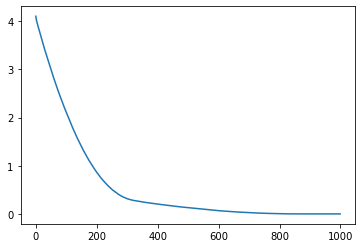

In [20]:
# loss값 그래프로 
plt.plot(hist.history['loss'])
plt.show()

In [24]:
# 학습 후
model.predict([0.01])

array([[0.33822092]], dtype=float32)

In [25]:
model.save('model/after_learning.h5')

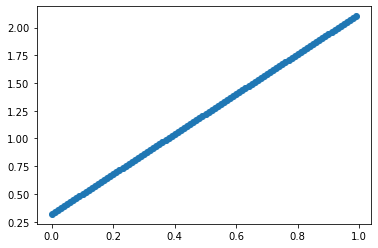

In [28]:
# 노이즈가 없는 데이터
plt.scatter(x=scaled_data_C,y=scaled_data_F)

## 1.3 노이즈가 있는 데이터로 실습

In [29]:
# 평균이 0이고 표준편차가 0.1인 데이터 100개
np.random.seed(703)
noise = np.array(np.random.normal(0,0.1,100))
noised_scaled_data_F = scaled_data_F+ noise

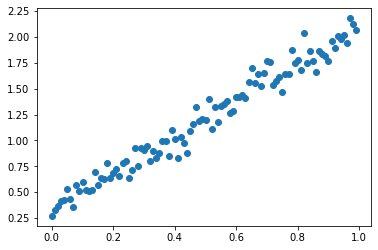

In [30]:
# 노이즈가 있는 데이터
plt.scatter(x=scaled_data_C,y=noised_scaled_data_F)

In [31]:
# 3.모델 구성
model2 = Sequential()
model2.add(Dense(1,input_dim=1))
# 4. 학습과정 설정
model2.compile(loss='mse',optimizer='rmsprop',metrics=['mae'])
print(model2.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None


In [32]:
# 5. 모델 학습시키기
hist2 = model2.fit(scaled_data_C,noised_scaled_data_F,epochs=1000,verbose=2)

Epoch 1/1000
4/4 - 0s - loss: 0.1438 - mae: 0.3671
Epoch 2/1000
4/4 - 0s - loss: 0.1358 - mae: 0.3562
Epoch 3/1000
4/4 - 0s - loss: 0.1300 - mae: 0.3480
Epoch 4/1000
4/4 - 0s - loss: 0.1252 - mae: 0.3412
Epoch 5/1000
4/4 - 0s - loss: 0.1209 - mae: 0.3349
Epoch 6/1000
4/4 - 0s - loss: 0.1167 - mae: 0.3286
Epoch 7/1000
4/4 - 0s - loss: 0.1127 - mae: 0.3224
Epoch 8/1000
4/4 - 0s - loss: 0.1089 - mae: 0.3165
Epoch 9/1000
4/4 - 0s - loss: 0.1051 - mae: 0.3106
Epoch 10/1000
4/4 - 0s - loss: 0.1015 - mae: 0.3048
Epoch 11/1000
4/4 - 0s - loss: 0.0981 - mae: 0.2992
Epoch 12/1000
4/4 - 0s - loss: 0.0947 - mae: 0.2935
Epoch 13/1000
4/4 - 0s - loss: 0.0913 - mae: 0.2877
Epoch 14/1000
4/4 - 0s - loss: 0.0880 - mae: 0.2817
Epoch 15/1000
4/4 - 0s - loss: 0.0849 - mae: 0.2763
Epoch 16/1000
4/4 - 0s - loss: 0.0817 - mae: 0.2703
Epoch 17/1000
4/4 - 0s - loss: 0.0786 - mae: 0.2646
Epoch 18/1000
4/4 - 0s - loss: 0.0757 - mae: 0.2591
Epoch 19/1000
4/4 - 0s - loss: 0.0730 - mae: 0.2539
Epoch 20/1000
4/4 - 0

Epoch 158/1000
4/4 - 0s - loss: 0.0087 - mae: 0.0717
Epoch 159/1000
4/4 - 0s - loss: 0.0087 - mae: 0.0718
Epoch 160/1000
4/4 - 0s - loss: 0.0087 - mae: 0.0717
Epoch 161/1000
4/4 - 0s - loss: 0.0087 - mae: 0.0717
Epoch 162/1000
4/4 - 0s - loss: 0.0087 - mae: 0.0717
Epoch 163/1000
4/4 - 0s - loss: 0.0087 - mae: 0.0717
Epoch 164/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0717
Epoch 165/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0716
Epoch 166/1000
4/4 - 0s - loss: 0.0087 - mae: 0.0717
Epoch 167/1000
4/4 - 0s - loss: 0.0087 - mae: 0.0717
Epoch 168/1000
4/4 - 0s - loss: 0.0087 - mae: 0.0717
Epoch 169/1000
4/4 - 0s - loss: 0.0087 - mae: 0.0717
Epoch 170/1000
4/4 - 0s - loss: 0.0087 - mae: 0.0717
Epoch 171/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0715
Epoch 172/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0714
Epoch 173/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0714
Epoch 174/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0714
Epoch 175/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0713
Epoch 176/1000
4/4 - 0s - loss: 0.0086 - mae: 

Epoch 313/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0708
Epoch 314/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0708
Epoch 315/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0709
Epoch 316/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0709
Epoch 317/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0708
Epoch 318/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0708
Epoch 319/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0709
Epoch 320/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0708
Epoch 321/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0708
Epoch 322/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0709
Epoch 323/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0707
Epoch 324/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0708
Epoch 325/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0708
Epoch 326/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0708
Epoch 327/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0708
Epoch 328/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0709
Epoch 329/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0708
Epoch 330/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0707
Epoch 331/1000
4/4 - 0s - loss: 0.0086 - mae: 

Epoch 468/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0708
Epoch 469/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0708
Epoch 470/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0709
Epoch 471/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0708
Epoch 472/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0709
Epoch 473/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0709
Epoch 474/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0709
Epoch 475/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0708
Epoch 476/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0708
Epoch 477/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0710
Epoch 478/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0708
Epoch 479/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0708
Epoch 480/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0710
Epoch 481/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0709
Epoch 482/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0708
Epoch 483/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0709
Epoch 484/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0707
Epoch 485/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0708
Epoch 486/1000
4/4 - 0s - loss: 0.0086 - mae: 

Epoch 623/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0707
Epoch 624/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0707
Epoch 625/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0706
Epoch 626/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0708
Epoch 627/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0707
Epoch 628/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0708
Epoch 629/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0707
Epoch 630/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0708
Epoch 631/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0709
Epoch 632/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0707
Epoch 633/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0707
Epoch 634/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0708
Epoch 635/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0707
Epoch 636/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0707
Epoch 637/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0707
Epoch 638/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0706
Epoch 639/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0707
Epoch 640/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0708
Epoch 641/1000
4/4 - 0s - loss: 0.0086 - mae: 

Epoch 778/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0708
Epoch 779/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0708
Epoch 780/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0707
Epoch 781/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0708
Epoch 782/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0707
Epoch 783/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0708
Epoch 784/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0708
Epoch 785/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0708
Epoch 786/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0709
Epoch 787/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0709
Epoch 788/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0710
Epoch 789/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0709
Epoch 790/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0709
Epoch 791/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0710
Epoch 792/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0709
Epoch 793/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0709
Epoch 794/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0709
Epoch 795/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0709
Epoch 796/1000
4/4 - 0s - loss: 0.0086 - mae: 

Epoch 933/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0707
Epoch 934/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0706
Epoch 935/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0707
Epoch 936/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0708
Epoch 937/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0709
Epoch 938/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0709
Epoch 939/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0707
Epoch 940/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0707
Epoch 941/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0706
Epoch 942/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0708
Epoch 943/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0708
Epoch 944/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0707
Epoch 945/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0707
Epoch 946/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0708
Epoch 947/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0708
Epoch 948/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0709
Epoch 949/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0709
Epoch 950/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0708
Epoch 951/1000
4/4 - 0s - loss: 0.0086 - mae: 

In [33]:
# 학습 후 확인
model2.predict([0.01])

array([[0.34622043]], dtype=float32)

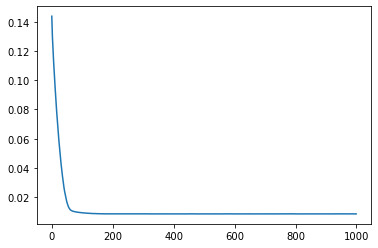

In [34]:
plt.plot(hist2.history['loss'])
plt.show()

In [35]:
model2.save('model/noise_after_learning.h5')

In [ ]:
# 노이즈가 있는경우 딥러닝해줘야 정확한 값으로 수렴한다